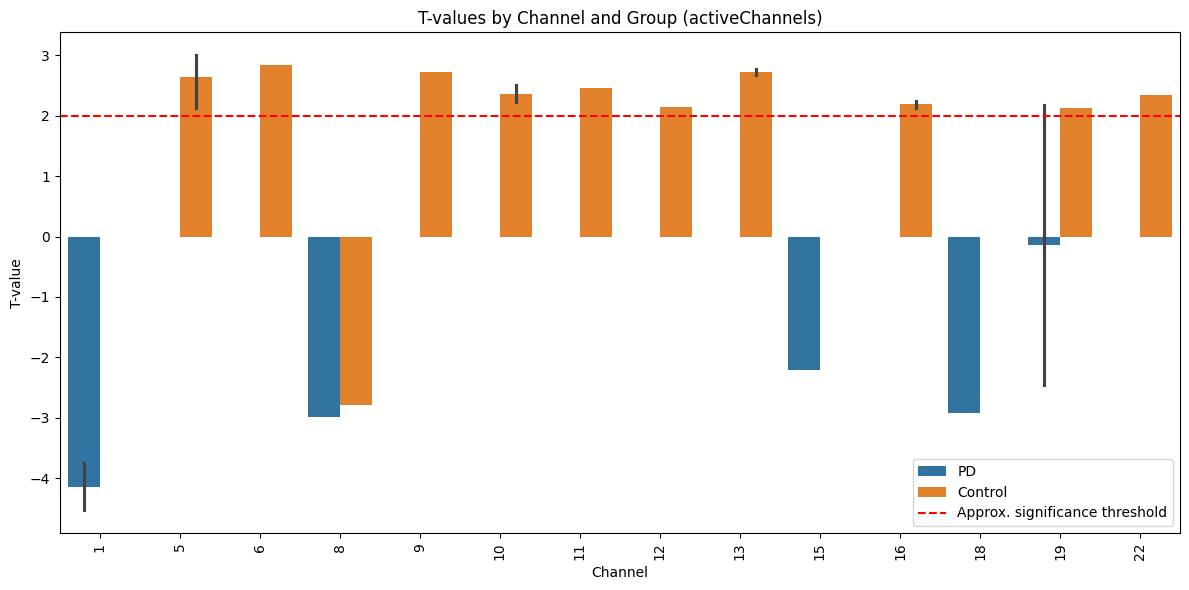

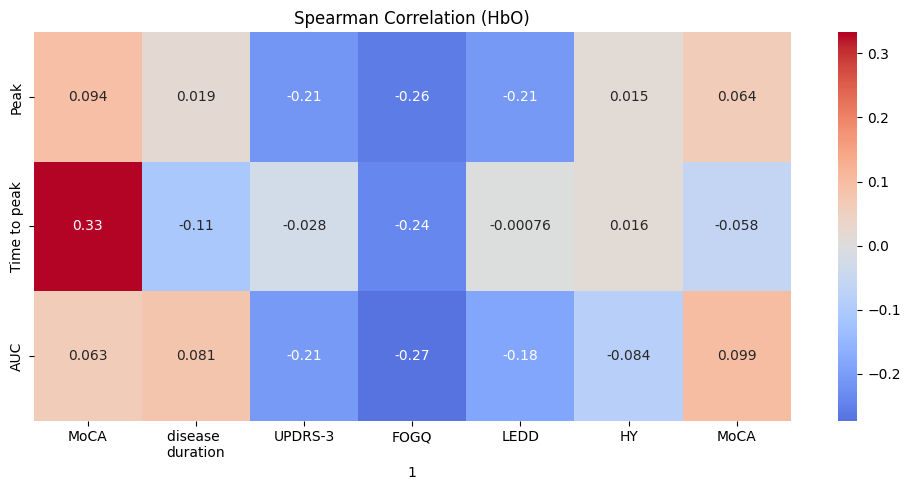

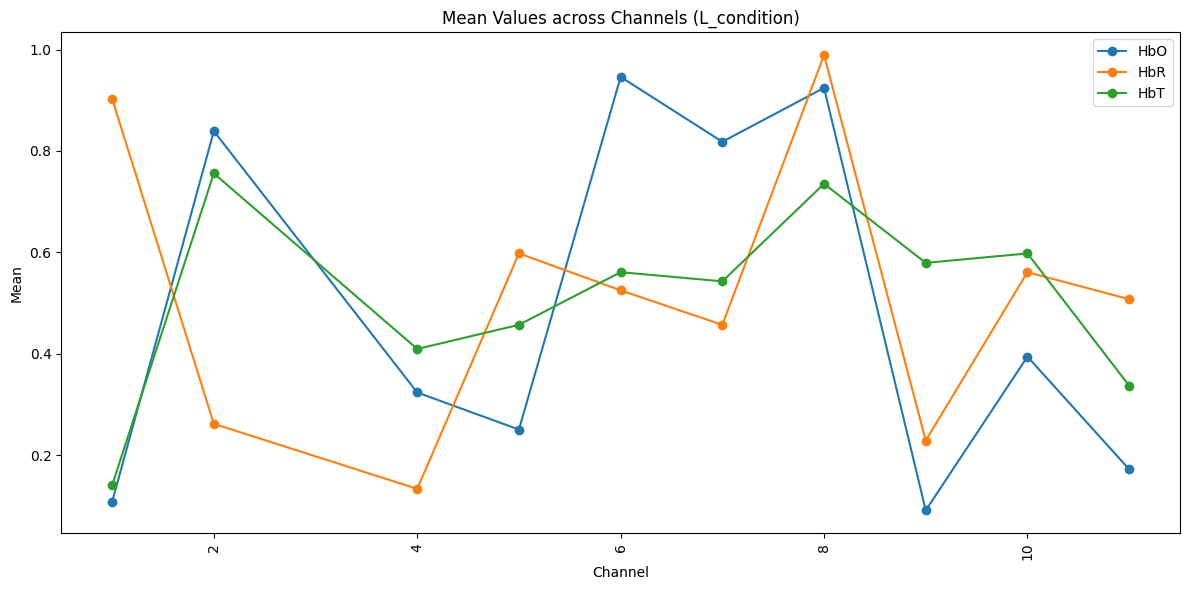

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set your Excel file path
file_path = r"C:\Users\vanga\OneDrive - Amrita vishwa vidyapeetham\Documents\group_stats.xlsx"

# Load Excel file
excel_data = pd.ExcelFile(file_path)

# --- Visualization 1: T-values from activeChannels ---
active_channels = excel_data.parse("activeChannels")

plt.figure(figsize=(12, 6))
sns.barplot(data=active_channels, x="Channel", y="tval", hue="Group")
plt.axhline(y=2, color='red', linestyle='--', label="Approx. significance threshold")
plt.title("T-values by Channel and Group (activeChannels)")
plt.ylabel("T-value")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("activeChannels_tval_plot.png")
plt.show()

# --- Visualization 2: Correlation heatmap for HbO ---
correlations = excel_data.parse("correlations")

# Extract and reshape correlation table
corr_hbo = correlations.iloc[2:5, 2:9].copy()
corr_hbo.columns = correlations.iloc[1, 2:9]
corr_hbo.index = ['Peak', 'Time to peak', 'AUC']
corr_hbo = corr_hbo.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 5))
sns.heatmap(corr_hbo, annot=True, cmap="coolwarm", center=0)
plt.title("Spearman Correlation (HbO)")
plt.tight_layout()
plt.savefig("correlation_hbo_heatmap.png")
plt.show()

# --- Visualization 3: Line plot of Mean values across channels (L_condition) ---
l_condition = excel_data.parse("L_condition")

# Fix column names and extract relevant data
# Mean values seem to be in columns 11-13: HbO, HbR, HbT
l_condition_clean = l_condition.iloc[1:, [0, 10, 11, 12]]
l_condition_clean.columns = ['Channel', 'HbO', 'HbR', 'HbT']
l_condition_clean = l_condition_clean.dropna()
l_condition_clean[['HbO', 'HbR', 'HbT']] = l_condition_clean[['HbO', 'HbR', 'HbT']].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 6))
for col in ['HbO', 'HbR', 'HbT']:
    plt.plot(l_condition_clean['Channel'], l_condition_clean[col], marker='o', label=col)

plt.title("Mean Values across Channels (L_condition)")
plt.xlabel("Channel")
plt.ylabel("Mean")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("l_condition_mean_plot.png")
plt.show()


In [5]:
import pandas as pd

file_path = r"C:\Users\vanga\OneDrive - Amrita vishwa vidyapeetham\Documents\group_stats.xlsx" # Use your correct path
excel_data = pd.ExcelFile(file_path)

print("Available sheets:")
print(excel_data.sheet_names)


Available sheets:
['activeChannels', 'L_condition', 'L_condition_Bonferroni', 'L_condition_FDR', 'R_condition', 'R_condition_Bonferroni', 'R_condition_FDR', 'FDR', 'correlations', 'walking_active_ch', 'fingerTapping_HbO', 'fingerTapping_HbR', 'fingerTapping_HbT']


In [6]:
for sheet in excel_data.sheet_names:
    print(f"\n--- {sheet} ---")
    df = excel_data.parse(sheet)
    print(df.head(3))  # Show top 3 rows



--- activeChannels ---
  Contrast    Group Condition  Channel  Source  Detector      tval      pval  \
0      HbO  Control         L        5       3         2  2.124106  0.047010   
1      HbO  Control         L        6       4         2  2.831663  0.010661   
2      HbO  Control         L        9       3         4  2.731039  0.013269   

   pval_corr  
0   0.047010  
1   0.035817  
2   0.035817  

--- L_condition ---
  Unnamed: 0 Unnamed: 1      Peak Unnamed: 3 Unnamed: 4 Time-to-peak  \
0    Channel        HbO       HbR        HbT        HbO          HbR   
1          1   0.336915  0.560852   0.507505   0.010099     0.423445   
2          2   0.675014  0.198834   0.967635   0.849658     0.413661   

  Unnamed: 6 Unnamed: 7       AUC Unnamed: 9 Unnamed: 10      Mean  \
0        HbT        HbO       HbR        HbT         HbO       HbR   
1   0.036988   0.107511  0.903116    0.14042    0.107511  0.903116   
2   0.606864   0.839232  0.261616   0.755743    0.839232  0.261616   

  Un

Available sheets: ['activeChannels', 'L_condition', 'L_condition_Bonferroni', 'L_condition_FDR', 'R_condition', 'R_condition_Bonferroni', 'R_condition_FDR', 'FDR', 'correlations', 'walking_active_ch', 'fingerTapping_HbO', 'fingerTapping_HbR', 'fingerTapping_HbT']
  Contrast    Group Condition  Channel  Source  Detector      tval      pval  \
0      HbO  Control         L        5       3         2  2.124106  0.047010   
1      HbO  Control         L        6       4         2  2.831663  0.010661   
2      HbO  Control         L        9       3         4  2.731039  0.013269   
3      HbO  Control         L       10       4         4  2.500390  0.021723   
4      HbO  Control         L       11       5         4  2.455382  0.023878   

   pval_corr  
0   0.047010  
1   0.035817  
2   0.035817  
3   0.035817  
4   0.035817  

Descriptive Statistics:
         Channel     Source   Detector       tval       pval  pval_corr
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.000

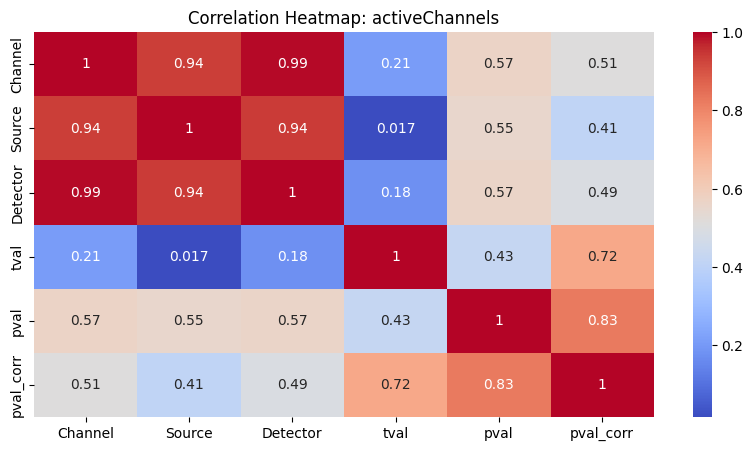

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
file_path = r"C:\Users\vanga\OneDrive - Amrita vishwa vidyapeetham\Documents\group_stats.xlsx"
xls = pd.ExcelFile(file_path)

# Show sheet names
print("Available sheets:", xls.sheet_names)

# Choose one sheet to explore
sheet = "activeChannels"  # change this to the one you want
df = xls.parse(sheet)

# Show data preview
print(df.head())

# Describe numeric data
print("\nDescriptive Statistics:")
print(df.describe())

# Plot correlation heatmap
numeric_cols = df.select_dtypes(include='number')
if not numeric_cols.empty:
    plt.figure(figsize=(10, 5))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap: {sheet}")
    plt.show()

# Plot a pairplot (if fewer columns)
if numeric_cols.shape[1] <= 5:
    sns.pairplot(numeric_cols)
    plt.show()
